In [163]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pyo
import plotly.graph_objs as go

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn import preprocessing
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator
from catboost import CatBoostClassifier
from urllib.request import urlopen

In [82]:
df = pd.read_csv('listings.csv')
df.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17629440,https://www.airbnb.com/rooms/17629440,20220911230914,2022-09-12,city scrape,ISOLA DEL CUORE,Stanchi da un viaggio in aereo 2 minuti e sentirsi come a Casa Vostra.<br />Potrete comodamente ...,Tranquillità immersa nel verde con due laghi meravigliosi vicini,https://a0.muscache.com/pictures/68d7eb8c-e5b6-465f-9bce-91179e3444e2.jpg,68534156,https://www.airbnb.com/users/show/68534156,Cristina,2016-04-23,"Rome, Italy",Mi piace viaggiare sono molto ospitale e ho viaggiato per lavoro tantissimo.\nAmo i fiori gli an...,within a few hours,100%,96%,t,https://a0.muscache.com/im/pictures/user/b0b95778-b84f-449c-8cf0-967774f5963f.jpg?aki_policy=pro...,https://a0.muscache.com/im/pictures/user/b0b95778-b84f-449c-8cf0-967774f5963f.jpg?aki_policy=pro...,NaN,2.0,3.0,"['email', 'phone']",t,t,"Ciampino, Lazio, Italy",VII San Giovanni/Cinecittà,NaN,41.78984,12.60899,Private room in rental unit,Private room,2,NaN,1 shared bath,1.0,1.0,"[""Heating"", ""Shampoo"", ""Cleaning products"", ""Hot water kettle"", ""Hangers"", ""Lock on bedroom door...",$45.00,1,3,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,8,38,68,343,2022-09-12,213,8,0,2017-04-09,2022-07-12,4.74,4.84,4.92,4.85,4.85,4.65,4.80,NaN,f,2,0,2,0,3.22
1,2737,https://www.airbnb.com/rooms/2737,20220911230914,2022-09-12,city scrape,"Elif's room in cozy, clean flat.","10 min by bus you can get to Piazza Venezia or Colosseum. All shops, gym, many trendy&local rest...",It used to be an industrial area until late 80s. <br />Now all the factories have became museums...,https://a0.muscache.com/pictures/41225252/e9553eba_original.jpg,3047,https://www.airbnb.com/users/show/3047,Elif,2008-09-18,"Rome, Italy","I am a Turkish-Italian who was born in Istanbul, travelled in different countries for livning or...",within a few hours,99%,3%,f,https://a0.muscache.com/im/pictures/user/de4f448c-ff0b-4617-aecc-c573b0060725.jpg?aki_policy=pro...,https://a0.muscache.com/im/pictures/user/de4f448c-ff0b-4617-aecc-c573b0060725.jpg?aki_policy=pro...,Testaccio,7.0,7.0,"['email', 'phone']",t,f,"Rome, Lazio, Italy",VIII Appia Antica,NaN,41.87136,12.48215,Private room,Private room,1,NaN,1.5 baths,1.0,1.0,"[""First aid kit"", ""Heating"", ""Elevator"", ""Wifi"", ""Hair dryer"", ""Long term stays allowed"", ""Dryer...",$50.00,7,1125,7.0,7.0,1125.0,1125.0,7.0,1125.0,NaN,t,30,60,90,365,2022-09-12,7,0,0,2014-12-26,2015-05-28,4.80,4.60,4.60,4.80,5.00,4.40,4.40,NaN,f,6,0,6,0,0.07
2,103870,https://www.airbnb.com/rooms/103870,20220911230914,2022-09-12,city scrape,CASACHICA Your holiday home in Rome,<b>The space</b><br />The cosy and central Apartment Casachica can sleep up to 3 people who want...,NaN,https://a0.muscache.com/pictures

In [83]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms',
       'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availa

Data Cleaning

In [84]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_colwidth", 100)
pd.set_option("display.width", 100)
pd.set_option("expand_frame_repr", True)

In [85]:
df = df[["id","host_since","host_id","host_identity_verified","host_is_superhost","latitude","longitude","room_type","bedrooms","beds","amenities","neighbourhood_cleansed","price","number_of_reviews","review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value","reviews_per_month"]]
df

,id,host_since,host_id,host_identity_verified,host_is_superhost,latitude,longitude,room_type,bedrooms,beds,amenities,neighbourhood_cleansed,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,17629440,2016-04-23,68534156,t,t,41.78984,12.60899,Private room,1.0,1.0,"[""Heating"", ""Shampoo"", ""Cleaning products"", ""Hot water kettle"", ""Hangers"", ""Lock on bedroom door...",VII San Giovanni/Cinecittà,$45.00,213,4.74,4.84,4.92,4.85,4.85,4.65,4.80,3.22
1,2737,2008-09-18,3047,f,f,41.87136,12.48215,Private room,1.0,1.0,"[""First aid kit"", ""Heating"", ""Elevator"", ""Wifi"", ""Hair dryer"", ""Long term stays allowed"", ""Dryer...",VIII Appia Antica,$50.00,7,4.80,4.60,4.60,4.80,5.00,4.40,4.40,0.07
2,103870,2011-04-26,535822,t,f,41.89711,12.50423,Entire home/apt,1.0,2.0,"[""Air conditioning"", ""Heating"", ""Lockbox"", ""Microwave"", ""Shampoo"", ""Coffee maker"", ""Hot water ke...",I Centro Storico,$78.00,225,4.11,4.37,4.22,4.65,4.53,4.40,4.20,1.64
3,2903,2008-09-28,3280,f,f,41.88824,12.46953,Private room,1.0,2.0,"[""Air conditioning"", ""First aid kit"", ""Heating"", ""Fire extinguisher"", ""Wifi"", ""Hair dryer"", ""TV""...",I Centro Storico,$164.00,55,4.28,4.26,4.67,4.59,4.70,4.74,4.48,0.33
4,104339,2011-04-28,543054,t,f,41.85585,12.48361,Entire home/apt,1.0,2.0,"[""Heating"", ""Paid parking off premises"", ""Luggage dropoff allowed"", ""Microwave"", ""Shampoo"", ""Cof...",VIII Appia Antica,$80.00,7,5.00,5.00,5.00,4.83,5.00,4.83,4.83,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24777,28042301,2018-08-26,211821938,t,f,41.64897,12.43349,Entire home/apt,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Heating"", ""Dishes and silverware"", ""Oven"", ""Hair dryer"", ""TV"", ""F...",X Ostia/Acilia,$55.00,17,4.53,4.76,4.88,4.94,4.88,4.82,4.65,0.35
24778,41256298,2019-04-03,252978577,t,f,41.79978,12.30112,Entire home/apt,1.0,1.0,"[""Private entrance"", ""Hot water"", ""Air conditioning"", ""Heating"", ""Wifi"", ""Hair dryer"", ""TV"", ""Br...",X Ostia/Acilia,$120.00,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.04
24779,15476977,2016-09-19,95809238,f,f,41.79590,12.29634,Private room,1.0,2.0,"[""Dedicated workspace"", ""Air conditioning"", ""Smart lock"", ""Heating"", ""Elevator"", ""Wifi"", ""TV"", ""...",X Ostia/Acilia,$165.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24780,42446790,2012-04-24,2214620,t,f,42.10042,12.38471,Private room,4.0,4.0,"[""Private entrance"", ""Hot water"", ""Air conditioning"", ""Heating"", ""Fire extinguisher"", ""Hair drye...",XV Cassia/Flaminia,$50.00,3,4.33,4.33,4.67,4.67,5.00,4.33,4.67,0.12


In [86]:
df.dropna(inplace=True)
df

,id,host_since,host_id,host_identity_verified,host_is_superhost,latitude,longitude,room_type,bedrooms,beds,amenities,neighbourhood_cleansed,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,17629440,2016-04-23,68534156,t,t,41.78984,12.60899,Private room,1.0,1.0,"[""Heating"", ""Shampoo"", ""Cleaning products"", ""Hot water kettle"", ""Hangers"", ""Lock on bedroom door...",VII San Giovanni/Cinecittà,$45.00,213,4.74,4.84,4.92,4.85,4.85,4.65,4.80,3.22
1,2737,2008-09-18,3047,f,f,41.87136,12.48215,Private room,1.0,1.0,"[""First aid kit"", ""Heating"", ""Elevator"", ""Wifi"", ""Hair dryer"", ""Long term stays allowed"", ""Dryer...",VIII Appia Antica,$50.00,7,4.80,4.60,4.60,4.80,5.00,4.40,4.40,0.07
2,103870,2011-04-26,535822,t,f,41.89711,12.50423,Entire home/apt,1.0,2.0,"[""Air conditioning"", ""Heating"", ""Lockbox"", ""Microwave"", ""Shampoo"", ""Coffee maker"", ""Hot water ke...",I Centro Storico,$78.00,225,4.11,4.37,4.22,4.65,4.53,4.40,4.20,1.64
3,2903,2008-09-28,3280,f,f,41.88824,12.46953,Private room,1.0,2.0,"[""Air conditioning"", ""First aid kit"", ""Heating"", ""Fire extinguisher"", ""Wifi"", ""Hair dryer"", ""TV""...",I Centro Storico,$164.00,55,4.28,4.26,4.67,4.59,4.70,4.74,4.48,0.33
4,104339,2011-04-28,543054,t,f,41.85585,12.48361,Entire home/apt,1.0,2.0,"[""Heating"", ""Paid parking off premises"", ""Luggage dropoff allowed"", ""Microwave"", ""Shampoo"", ""Cof...",VIII Appia Antica,$80.00,7,5.00,5.00,5.00,4.83,5.00,4.83,4.83,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24776,22538683,2018-01-03,165551807,t,t,41.72610,12.61941,Entire home/apt,3.0,4.0,"[""Private entrance"", ""Hot water"", ""First aid kit"", ""Heating"", ""Fire extinguisher"", ""Wifi"", ""Hair...",IX Eur,$96.00,20,4.85,5.00,5.00,4.95,4.85,4.70,4.75,0.38
24777,28042301,2018-08-26,211821938,t,f,41.64897,12.43349,Entire home/apt,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Heating"", ""Dishes and silverware"", ""Oven"", ""Hair dryer"", ""TV"", ""F...",X Ostia/Acilia,$55.00,17,4.53,4.76,4.88,4.94,4.88,4.82,4.65,0.35
24778,41256298,2019-04-03,252978577,t,f,41.79978,12.30112,Entire home/apt,1.0,1.0,"[""Private entrance"", ""Hot water"", ""Air conditioning"", ""Heating"", ""Wifi"", ""Hair dryer"", ""TV"", ""Br...",X Ostia/Acilia,$120.00,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.04
24780,42446790,2012-04-24,2214620,t,f,42.10042,12.38471,Private room,4.0,4.0,"[""Private entrance"", ""Hot water"", ""Air conditioning"", ""Heating"", ""Fire extinguisher"", ""Hair drye...",XV Cassia/Flaminia,$50.00,3,4.33,4.33,4.67,4.67,5.00,4.33,4.67,0.12


In [87]:
df.dtypes

id                               int64
host_since                      object
host_id                          int64
host_identity_verified          object
host_is_superhost               object
latitude                       float64
longitude                      float64
room_type                       object
bedrooms                       float64
beds                           float64
amenities                       object
neighbourhood_cleansed          object
price                           object
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
reviews_per_month              float64
dtype: object

Encoding

In [88]:
df['price'].unique()

array(['$45.00', '$50.00', '$78.00', '$164.00', '$80.00', '$90.00',
       '$100.00', '$75.00', '$40.00', '$70.00', '$34.00', '$101.00',
       '$103.00', '$210.00', '$49.00', '$130.00', '$180.00', '$194.00',
       '$146.00', '$115.00', '$173.00', '$95.00', '$44.00', '$20.00',
       '$225.00', '$73.00', '$529.00', '$218.00', '$117.00', '$104.00',
       '$65.00', '$59.00', '$196.00', '$120.00', '$110.00', '$113.00',
       '$83.00', '$26.00', '$72.00', '$67.00', '$150.00', '$85.00',
       '$107.00', '$74.00', '$140.00', '$54.00', '$111.00', '$87.00',
       '$98.00', '$60.00', '$37.00', '$203.00', '$112.00', '$522.00',
       '$1,182.00', '$964.00', '$307.00', '$102.00', '$39.00', '$89.00',
       '$160.00', '$161.00', '$200.00', '$118.00', '$30.00', '$63.00',
       '$58.00', '$181.00', '$88.00', '$133.00', '$108.00', '$57.00',
       '$171.00', '$96.00', '$217.00', '$19.00', '$99.00', '$31.00',
       '$53.00', '$153.00', '$79.00', '$36.00', '$347.00', '$645.00',
       '$105.00',

Encoding Price

In [89]:
df['price'] = pd.to_numeric(df['price'].str.replace('$', '').str.replace(',', ''))

C:\Users\ozden\AppData\Local\Temp\ipykernel_15408\1429369164.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [90]:
df['price']

0         45.0
1         50.0
2         78.0
3        164.0
4         80.0
         ...  
24776     96.0
24777     55.0
24778    120.0
24780     50.0
24781     40.0
Name: price, Length: 20159, dtype: float64

Encoding Superhost Value

In [91]:
df['host_is_superhost'] = df['host_is_superhost'].replace({'t': 1, 'f': 0})

Encoding Verified Account Value

In [92]:
df['host_identity_verified'] = df['host_identity_verified'].replace({'t': 1, 'f': 0})

Encoding Host Since Information

In [93]:
df['host_since'] = pd.to_datetime(df['host_since'])

I make a copy in advance in case we need to use the original dataframe without changing it.


In [94]:
df1 = df

In [95]:
df.dtypes

id                                      int64
host_since                     datetime64[ns]
host_id                                 int64
host_identity_verified                  int64
host_is_superhost                       int64
latitude                              float64
longitude                             float64
room_type                              object
bedrooms                              float64
beds                                  float64
amenities                              object
neighbourhood_cleansed                 object
price                                 float64
number_of_reviews                       int64
review_scores_rating                  float64
review_scores_accuracy                float64
review_scores_cleanliness             float64
review_scores_checkin                 float64
review_scores_communication           float64
review_scores_location                float64
review_scores_value                   float64
reviews_per_month                 

In [96]:
df.describe()

,id,host_id,host_identity_verified,host_is_superhost,latitude,longitude,bedrooms,beds,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,2.015900e+04,2.015900e+04,20159.000000,20159.000000,20159.000000,20159.000000,20159.000000,20159.000000,20159.000000,20159.000000,20159.000000,20159.000000,20159.000000,20159.000000,20159.000000,20159.000000,20159.000000,20159.000000
mean,7.419502e+16,1.136732e+08,0.887147,0.296939,41.891261,12.479298,1.487127,2.287266,154.059045,58.496602,4.698620,4.756131,4.729032,4.829514,4.819874,4.739638,4.666552,1.442857
std,2.021429e+17,1.318540e+08,0.316421,0.456921,0.039601,0.052586,0.861601,1.599829,692.644269,83.587567,0.401241,0.395091,0.391525,0.335229,0.360113,0.365266,0.401955,1.520126
min,2.737000e+03,1.822000e+03,0.000000,0.000000,41.646040,12.221320,1.000000,1.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,1.181447e+07,1.355930e+07,1.000000,0.000000,41.886395,12.461929,1.000000,1.000000,70.000000,6.000000,4.600000,4.700000,4.650000,4.800000,4.800000,4.630000,4.580000,0.310000
50%,2.757075e+07,5.000110e+07,1.000000,0.000000,41.896400,12.477430,1.000000,2.000000,103.000000,24.000000,4.800000,4.860000,4.840000,4.920000,4.930000,4.850000,4.760000,0.960000
75%,4.566598e+07,1.864458e+08,1.000000,1.000000,41.905679,12.502820,2.000000,3.000000,161.000000,75.000000,4.940000,4.970000,4.970000,5.000000,5.000000,4.980000,4.880000,2.090000
max,7.100789e+17,4.778250e+08,1.000000,1.000000,42.148796,12.830400,21.000000,28.000000,90963.000000,1120.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,33.530000


Data Analysis

In [97]:
top_host_id = df['host_id'].value_counts().head(10)
top_host_id

23532561     193
96122546     117
8973851       55
63191555      54
224869116     45
316068        43
2405376       38
1107433       35
1764914       35
1369759       34
Name: host_id, dtype: int64

[Text(0, 0, '23532561'),
 Text(1, 0, '96122546'),
 Text(2, 0, '8973851'),
 Text(3, 0, '63191555'),
 Text(4, 0, '224869116'),
 Text(5, 0, '316068'),
 Text(6, 0, '2405376'),
 Text(7, 0, '1107433'),
 Text(8, 0, '1764914'),
 Text(9, 0, '1369759')]

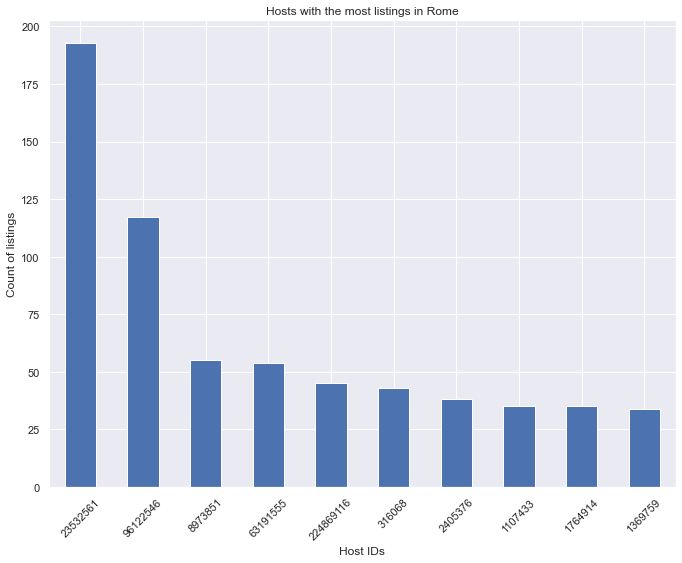

In [98]:
sns.set(rc={'figure.figsize':(10,8)})
viz_bar = top_host_id.plot(kind='bar')
viz_bar.set_title('Hosts with the most listings in Rome')
viz_bar.set_xlabel('Host IDs')
viz_bar.set_ylabel('Count of listings')
viz_bar.set_xticklabels(viz_bar.get_xticklabels(), rotation=45)

Text(0.5, 1.0, 'Distribution of Room Type')

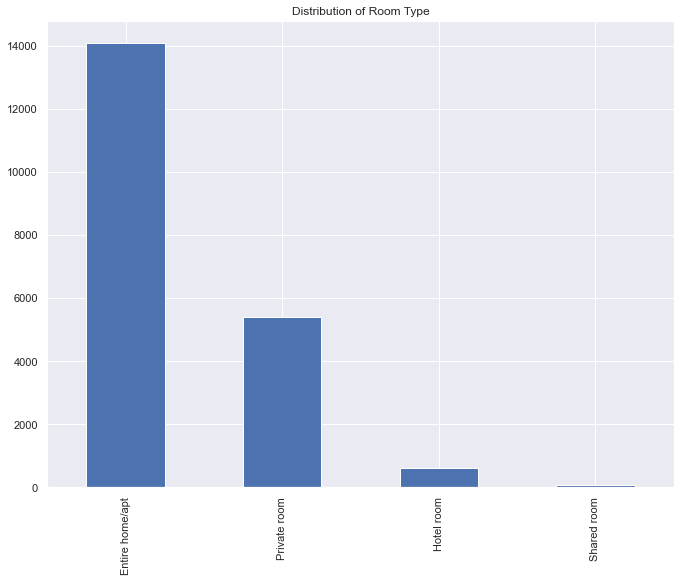

In [99]:
sns.set(rc={'figure.figsize':(10,8)})
viz_bar = df.room_type.value_counts().plot(kind='bar')
viz_bar.set_title('Distribution of Room Type')

Text(0.5, 1.0, 'Distribution of Superhost')

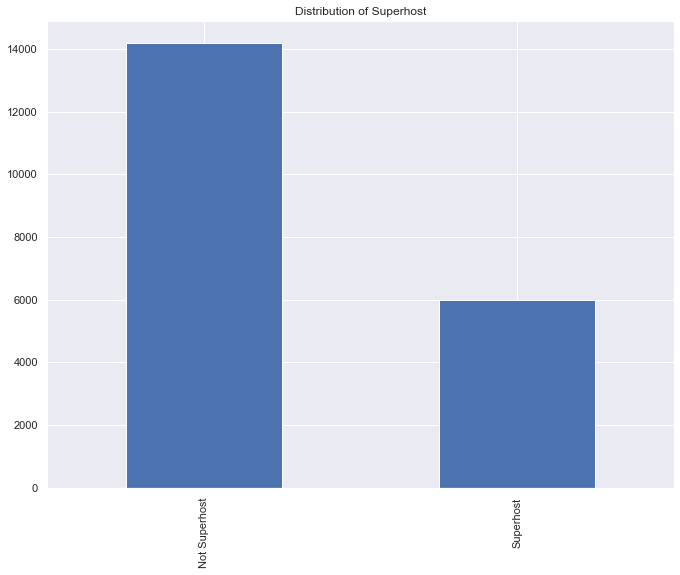

In [100]:
df1['host_is_superhost'] = df['host_is_superhost'].replace({1: 'Superhost', 0: 'Not Superhost'})
sns.set(rc={'figure.figsize':(10,8)})
viz_bar = df1.host_is_superhost.value_counts().plot(kind='bar')
viz_bar.set_title('Distribution of Superhost')


Text(0.5, 1.0, 'Distribution of Verified Account')

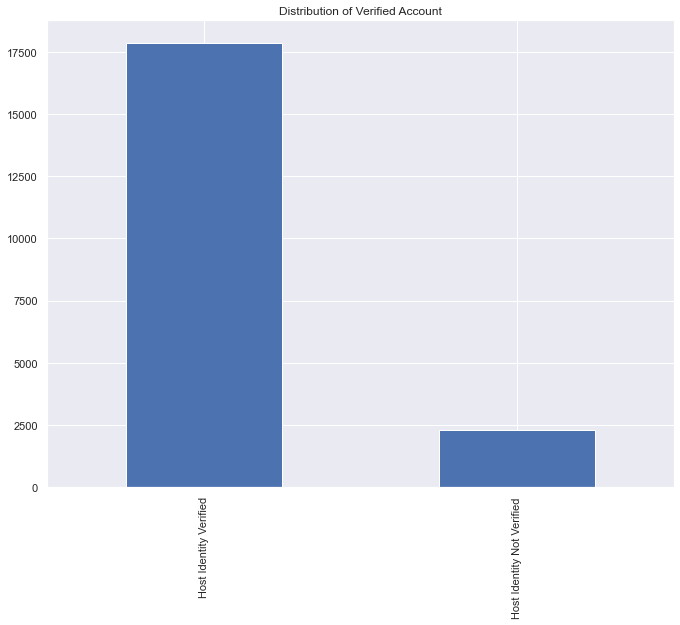

In [101]:
df1['host_identity_verified'] = df1['host_identity_verified'].replace({1: 'Host Identity Verified', 0: 'Host Identity Not Verified'})
sns.set(rc={'figure.figsize':(10,8)})
viz_bar = df1.host_identity_verified.value_counts().plot(kind='bar')
viz_bar.set_title('Distribution of Verified Account')

In [102]:
df['neighbourhood_cleansed'].unique()

array(['VII San Giovanni/Cinecittà', 'VIII Appia Antica',
       'I Centro Storico', 'II Parioli/Nomentano', 'XIV Monte Mario',
       'V Prenestino/Centocelle', 'IV Tiburtina', 'XIII Aurelia',
       'XII Monte Verde', 'IX Eur', 'X Ostia/Acilia',
       'XV Cassia/Flaminia', 'VI Roma delle Torri', 'III Monte Sacro',
       'XI Arvalia/Portuense'], dtype=object)

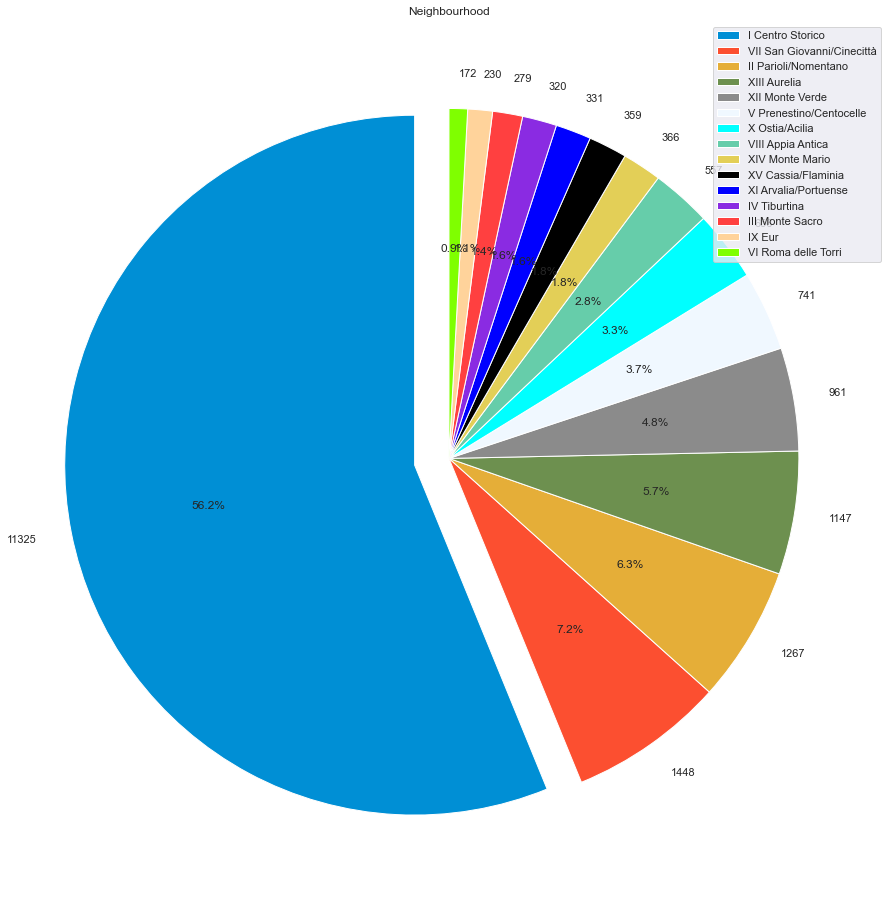

In [103]:
labels = df.neighbourhood_cleansed.value_counts().index
colors = ['#008fd5','#fc4f30','#e5ae38','#6d904f','#8b8b8b','#F0F8FF','#00FFFF','#66CDAA','#E3CF57','#000000','#0000FF','#8A2BE2','#FF4040','#FFD39B','#7FFF00']
explode = (0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
shape = df.neighbourhood_cleansed.value_counts().values
plt.figure(figsize=(15,15))
plt.pie(shape, explode = explode, labels=shape, colors= colors, autopct = '%1.1f%%', startangle=90)
plt.legend(labels)
plt.title('Neighbourhood')
plt.show()

In [104]:
color_dict = {'Private room': '#cc5a49', 'Entire home/apt' : '#4586ac', 'Shared room' : '#21908d', 'Hotel room' : '#C0C0C0' }
airbnb_types=df.groupby(['neighbourhood_cleansed', 'room_type']).size()
for region in df.neighbourhood_cleansed.unique():
    plt.figure(figsize=(24,12))
    airbnb_reg=airbnb_types[region]
    labels = airbnb_reg.index
    sizes = airbnb_reg.values
    colors = [color_dict[x] for x in labels]
    
    reg_ch = go.Figure(data = [go.Pie(labels = labels, values = sizes, hole = 0.6)])
    reg_ch.update_traces(title = region, marker=dict(colors=colors))
    reg_ch.show()

<Figure size 1728x864 with 0 Axes>

<Figure size 1728x864 with 0 Axes>

<Figure size 1728x864 with 0 Axes>

<Figure size 1728x864 with 0 Axes>

<Figure size 1728x864 with 0 Axes>

<Figure size 1728x864 with 0 Axes>

<Figure size 1728x864 with 0 Axes>

<Figure size 1728x864 with 0 Axes>

<Figure size 1728x864 with 0 Axes>

<Figure size 1728x864 with 0 Axes>

<Figure size 1728x864 with 0 Axes>

<Figure size 1728x864 with 0 Axes>

<Figure size 1728x864 with 0 Axes>

<Figure size 1728x864 with 0 Axes>

<Figure size 1728x864 with 0 Axes>

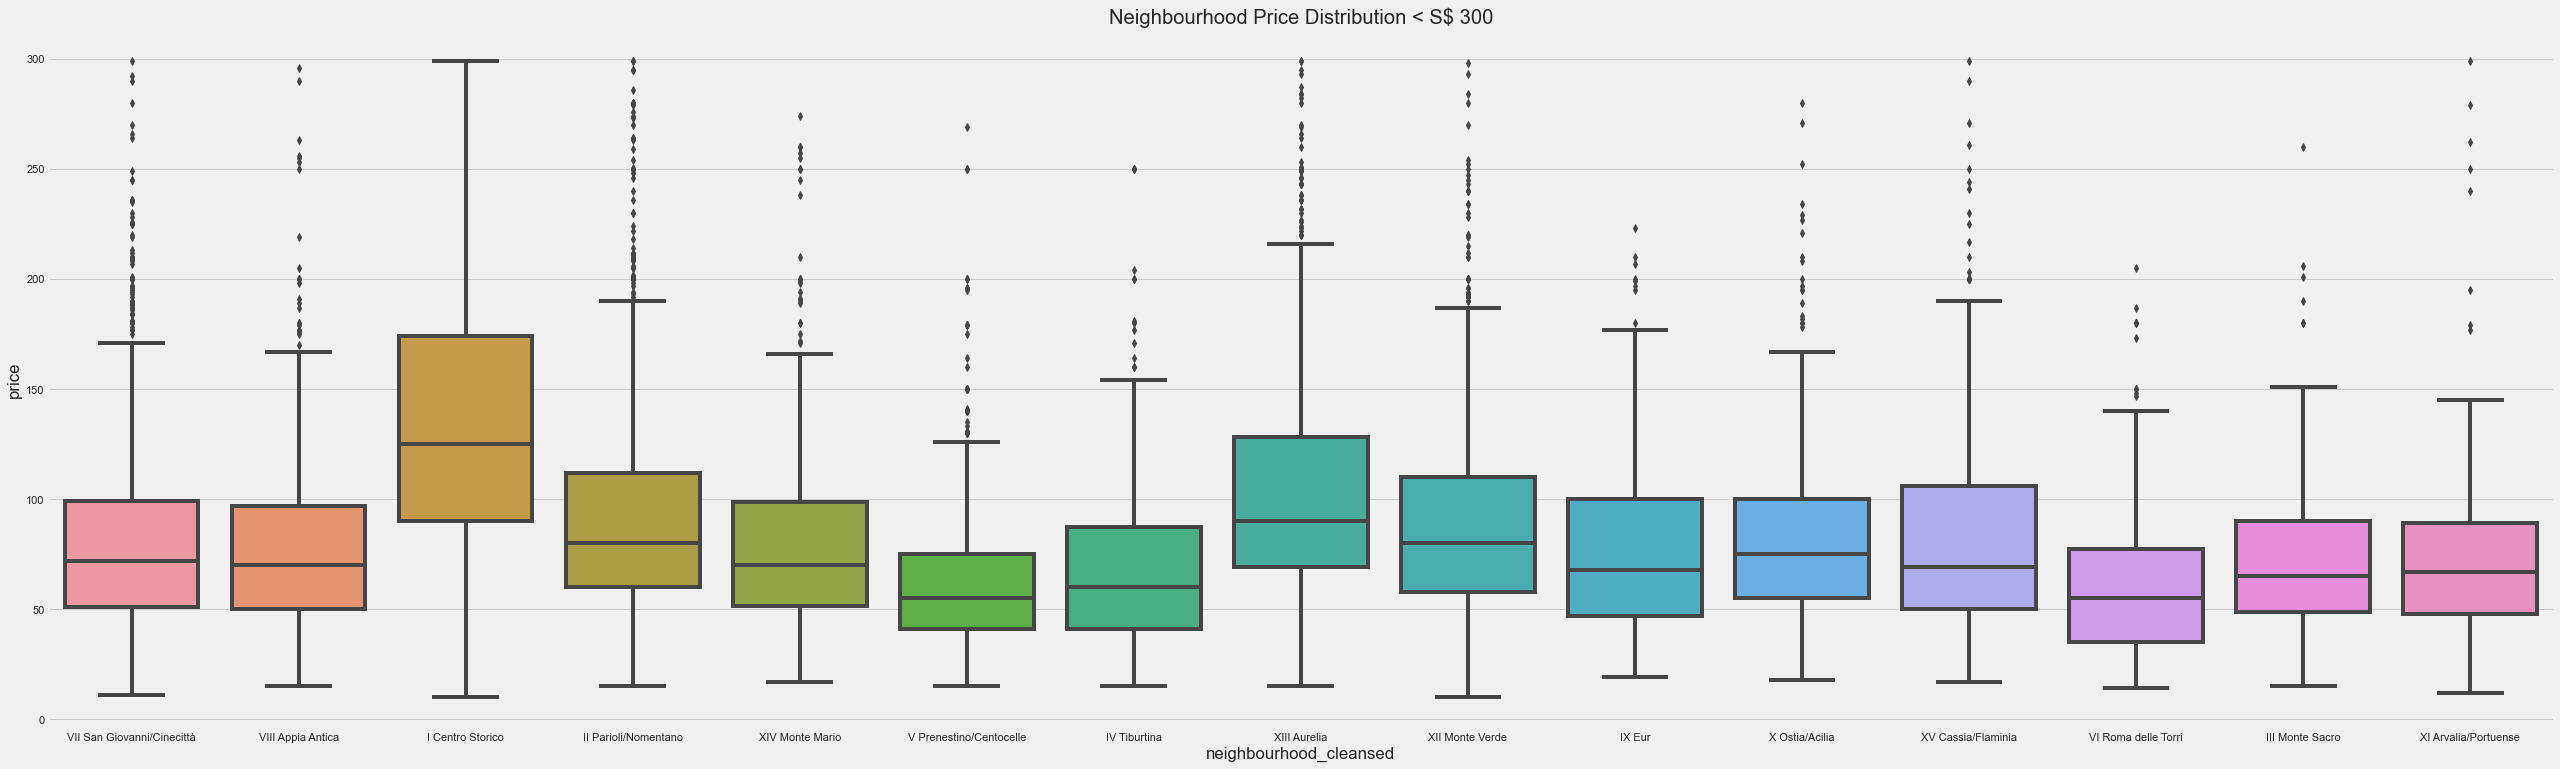

In [105]:
df1 = df[df.price < 300]
plt.style.use('fivethirtyeight')
plt.figure(figsize=(40,12))
sns.boxplot(y='price',x='neighbourhood_cleansed',data = df1)
plt.title('Neighbourhood Price Distribution < S$ 300')
plt.show()

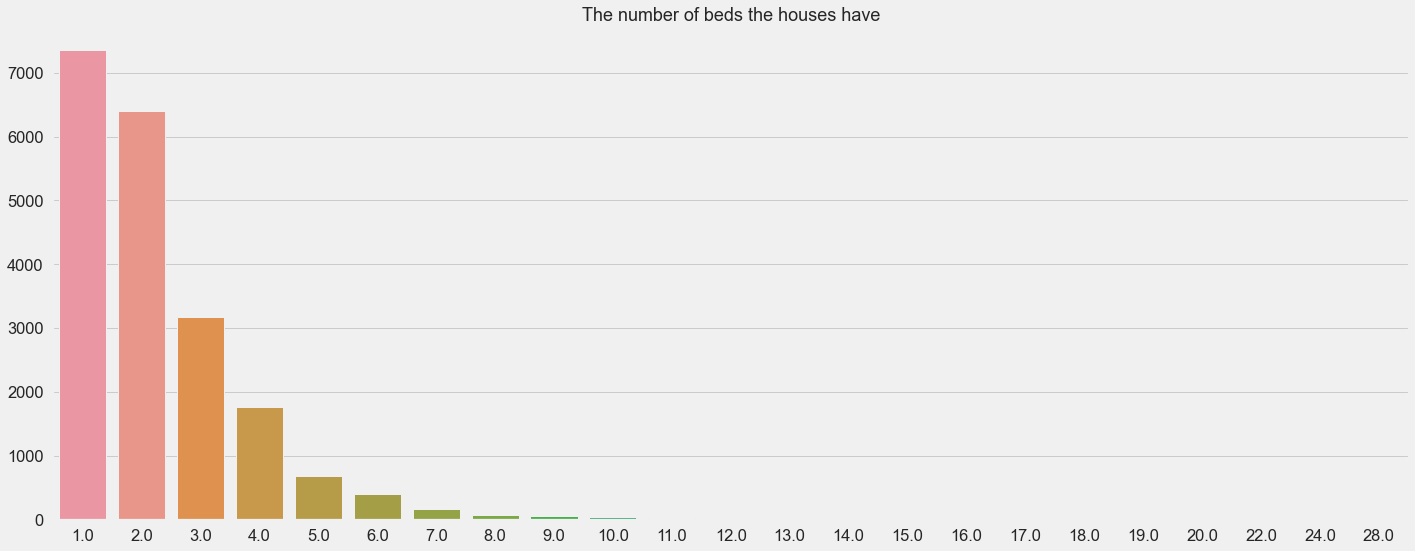

In [106]:
plt.figure(figsize=(20,8))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df.beds.value_counts().index,y=df.beds.value_counts().values)
plt.title("The number of beds the houses have")
plt.tight_layout()

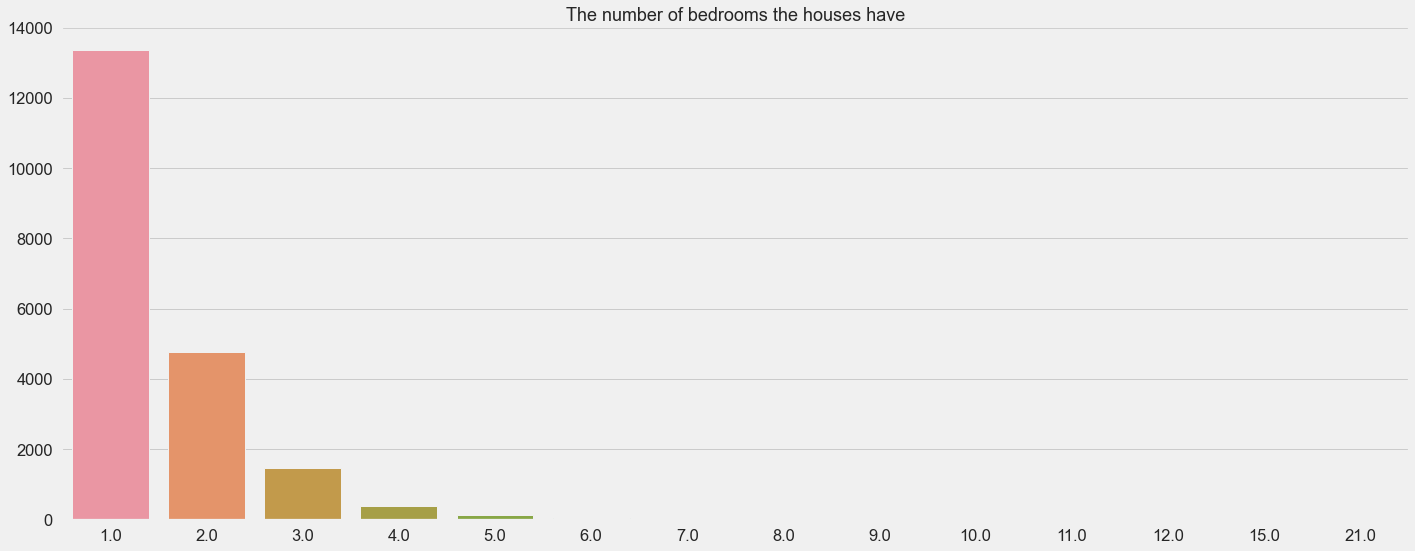

In [107]:
plt.figure(figsize=(20,8))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df.bedrooms.value_counts().index,y=df.bedrooms.value_counts().values)
plt.title("The number of bedrooms the houses have")
plt.tight_layout()

In [108]:
df.nlargest(10, 'number_of_reviews')

,id,host_since,host_id,host_identity_verified,host_is_superhost,latitude,longitude,room_type,bedrooms,beds,amenities,neighbourhood_cleansed,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
13791,35636293,2014-08-14,20028020,Host Identity Verified,Superhost,41.900249,12.495944,Private room,1.0,1.0,"[""Luggage dropoff allowed"", ""42\"" HDTV with standard cable"", ""Coffee maker"", ""Shampoo"", ""Cleanin...",I Centro Storico,193.0,1120,4.82,4.85,4.91,4.91,4.89,4.90,4.81,33.53
1546,2399029,2014-02-15,12258559,Host Identity Verified,Not Superhost,41.894260,12.490240,Private room,1.0,2.0,"[""Private entrance"", ""Hot water"", ""AC - split type ductless system"", ""Heating"", ""Refrigerator"", ...",I Centro Storico,43.0,932,4.67,4.74,4.78,4.87,4.80,4.95,4.76,9.07
1741,2709785,2014-02-15,12258559,Host Identity Verified,Not Superhost,41.894360,12.490250,Private room,1.0,2.0,"[""Heating"", ""Luggage dropoff allowed"", ""Breakfast"", ""Shampoo"", ""Hangers"", ""Lock on bedroom door""...",I Centro Storico,38.0,854,4.70,4.77,4.81,4.90,4.80,4.94,4.75,8.34
577,747656,2012-10-20,3925580,Host Identity Verified,Superhost,41.892910,12.471450,Entire home/apt,1.0,1.0,"[""Air conditioning"", ""Heating"", ""Ethernet connection"", ""Breakfast"", ""Keurig coffee machine"", ""Mi...",I Centro Storico,89.0,774,4.85,4.85,4.88,4.94,4.93,4.94,4.83,6.44
853,865289,2012-10-15,3873669,Host Identity Verified,Not Superhost,41.895480,12.474850,Entire home/apt,1.0,1.0,"[""Heating"", ""Paid parking off premises"", ""Ethernet connection"", ""HDTV"", ""Coffee maker"", ""Shampoo...",I Centro Storico,72.0,773,4.20,4.26,4.28,4.72,4.71,4.93,4.31,6.61
1171,1385250,2013-07-10,7392775,Host Identity Verified,Superhost,41.889850,12.473460,Entire home/apt,1.0,1.0,"[""Air conditioning"", ""Heating"", ""Paid parking off premises"", ""Luggage dropoff allowed"", ""Coffee ...",I Centro Storico,70.0,765,4.75,4.79,4.80,4.91,4.91,4.91,4.72,6.90
1145,1373696,2013-07-10,7392775,Host Identity Verified,Superhost,41.888370,12.474530,Entire home/apt,2.0,2.0,"[""Air conditioning"", ""Heating"", ""Paid parking off premises"", ""Ethernet connection"", ""Microwave"",...",I Centro Storico,100.0,749,4.89,4.94,4.93,4.96,4.96,4.93,4.87,6.75
1249,1262834,2013-06-12,6876317,Host Identity Verified,Superhost,41.890380,12.472890,Entire home/apt,1.0,1.0,"[""Bathroom essentials"", ""Air conditioning"", ""Children\u2019s dinnerware"", ""Heating"", ""Crib"", ""Ir...",I Centro Storico,75.0,747,4.78,4.79,4.69,4.87,4.82,4.93,4.75,6.74
739,825299,2012-10-20,3925580,Host Identity Verified,Superhost,41.895880,12.472890,Entire home/apt,1.0,1.0,"[""Air conditioning"", ""Heating"", ""Ethernet connection"", ""Breakfast"", ""Microwave"", ""Shampoo"", ""Cof...",I Centro Storico,93.0,735,4.91,4.92,4.90,4.95,4.95,4.94,4.90,6.31
503,470817,2012-05-10,2336397,Host Identity Verified,Not Superhost,41.895340,12.506250,Private room,1.0,1.0,"[""Elevator"", ""Essentials"", ""Heating"", ""Long term stays allowed""]",I Centro Storico,25.0,717,4.30,4.32,4.63,4.74,4.70,4.08,4.33,5.80


En çok yorum yapılan yerlerin I Centro Storico'da olduğunu tespit ettik ayrıca hepsinin tanımlı hesap olmasıda dikkat çekici

In [109]:
amenities=[]
for amenity in df.amenities:
    amenities.append(amenity)

def split_name(i):
    s = str(i).split()
    return s

amenities_count = []
for n in amenities:
    for word in split_name(n):
        word = word.lower()
        amenities_count.append(word)

In [110]:
top_25 = Counter(amenities_count).most_common()
top_25 = top_25[:25]
top_25

[('and', 27079),
 ('allowed",', 23798),
 ('"hot', 19498),
 ('dryer",', 18676),
 ('"hair', 18632),
 ('"wifi",', 18410),
 ('"essentials",', 17921),
 ('term', 17752),
 ('stays', 17752),
 ('"long', 17717),
 ('"kitchen",', 15939),
 ('"hangers",', 15840),
 ('water",', 15729),
 ('"shampoo",', 14028),
 ('silverware",', 13961),
 ('"dishes', 13958),
 ('"refrigerator",', 13904),
 ('conditioning",', 13794),
 ('"free', 13732),
 ('"heating",', 13246),
 ('maker",', 13139),
 ('"cooking', 12837),
 ('basics",', 12818),
 ('"coffee', 12717),
 ('"tv",', 12342)]

[Text(0, 0, 'and'),
 Text(1, 0, 'allowed",'),
 Text(2, 0, '"hot'),
 Text(3, 0, 'dryer",'),
 Text(4, 0, '"hair'),
 Text(5, 0, '"wifi",'),
 Text(6, 0, '"essentials",'),
 Text(7, 0, 'term'),
 Text(8, 0, 'stays'),
 Text(9, 0, '"long'),
 Text(10, 0, '"kitchen",'),
 Text(11, 0, '"hangers",'),
 Text(12, 0, 'water",'),
 Text(13, 0, '"shampoo",'),
 Text(14, 0, 'silverware",'),
 Text(15, 0, '"dishes'),
 Text(16, 0, '"refrigerator",'),
 Text(17, 0, 'conditioning",'),
 Text(18, 0, '"free'),
 Text(19, 0, '"heating",'),
 Text(20, 0, 'maker",'),
 Text(21, 0, '"cooking'),
 Text(22, 0, 'basics",'),
 Text(23, 0, '"coffee'),
 Text(24, 0, '"tv",')]

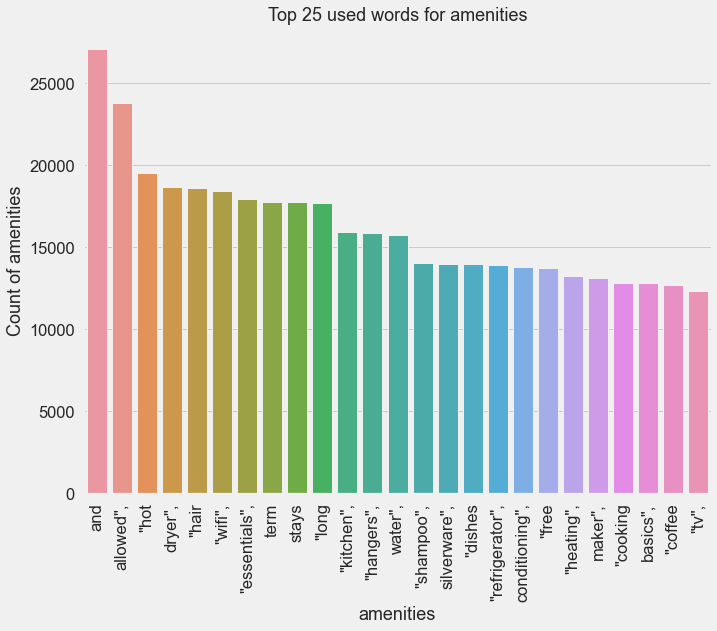

In [111]:
word_count_data = pd.DataFrame(top_25)
word_count_data.rename(columns={0:'amenities',1:'Counts'},inplace=True)
viz_count = sns.barplot(x='amenities',y='Counts', data = word_count_data)
viz_count.set_title('Top 25 used words for amenities')
viz_count.set_ylabel('Count of amenities')
viz_count.set_xlabel('amenities')
viz_count.set_xticklabels(viz_count.get_xticklabels(),rotation = 90)

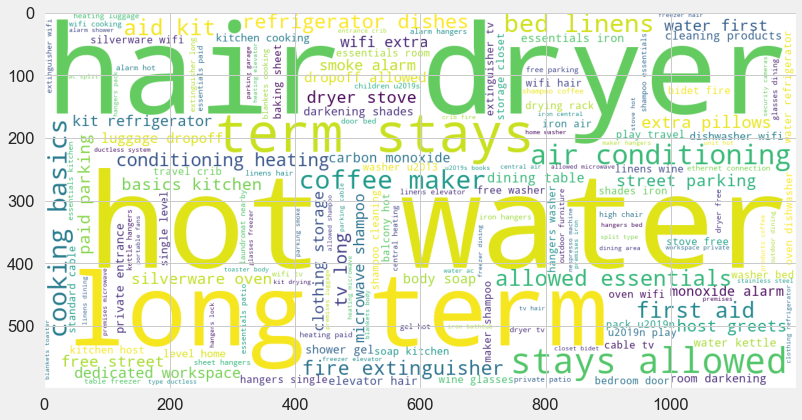

In [112]:
text = ' '.join(str(n).lower() for n in df.amenities)
plt.figure(figsize=(12,12))
cloud = WordCloud(width = 1200, height = 600,
                  background_color ='white',
                  min_font_size = 10)
cloud = plt.imshow(cloud.generate((text)))

In [113]:
df.columns

Index(['id', 'host_since', 'host_id', 'host_identity_verified', 'host_is_superhost', 'latitude',
       'longitude', 'room_type', 'bedrooms', 'beds', 'amenities', 'neighbourhood_cleansed',
       'price', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month'],
      dtype='object')

In [127]:
df["amenities"]

0        ["Heating", "Shampoo", "Cleaning products", "Hot water kettle", "Hangers", "Lock on bedroom door...
1        ["First aid kit", "Heating", "Elevator", "Wifi", "Hair dryer", "Long term stays allowed", "Dryer...
2        ["Air conditioning", "Heating", "Lockbox", "Microwave", "Shampoo", "Coffee maker", "Hot water ke...
3        ["Air conditioning", "First aid kit", "Heating", "Fire extinguisher", "Wifi", "Hair dryer", "TV"...
4        ["Heating", "Paid parking off premises", "Luggage dropoff allowed", "Microwave", "Shampoo", "Cof...
                                                        ...                                                 
24776    ["Private entrance", "Hot water", "First aid kit", "Heating", "Fire extinguisher", "Wifi", "Hair...
24777    ["Hot water", "Refrigerator", "Heating", "Dishes and silverware", "Oven", "Hair dryer", "TV", "F...
24778    ["Private entrance", "Hot water", "Air conditioning", "Heating", "Wifi", "Hair dryer", "TV", "Br...
24780    ["Private 

# son

In [114]:
amenities_list = list(df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)

In [132]:
df.loc[df['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
df.loc[df['amenities'].str.contains('Heating'), 'heating'] = 1
df.loc[df['amenities'].str.contains('Hot water'), 'hot water'] = 1
df.loc[df['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
df.loc[df['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
df.loc[df['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
df.loc[df['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
df.loc[df['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
df.loc[df['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
df.loc[df['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
df.loc[df['amenities'].str.contains('TV'), 'tv'] = 1
df.loc[df['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
df.loc[df['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
df.loc[df['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
df.loc[df['amenities'].str.contains('Elevator'), 'elevator'] = 1
df.loc[df['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
df.loc[df['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
df.loc[df['amenities'].str.contains('parking'), 'parking'] = 1
df.loc[df['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
df.loc[df['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
df.loc[df['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
df.loc[df['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
df.loc[df['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
df.loc[df['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
df.loc[df['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
df.loc[df['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
df.loc[df['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
df.loc[df['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
df.loc[df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

C:\Users\ozden\AppData\Local\Temp\ipykernel_15408\488653525.py:24: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



In [133]:
cols_to_replace_nulls = df.iloc[:,22:].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

In [135]:
df = df.dropna(axis=1, how='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20159 entries, 0 to 24781
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           20159 non-null  int64         
 1   host_since                   20159 non-null  datetime64[ns]
 2   host_id                      20159 non-null  int64         
 3   host_identity_verified       20159 non-null  object        
 4   host_is_superhost            20159 non-null  object        
 5   latitude                     20159 non-null  float64       
 6   longitude                    20159 non-null  float64       
 7   room_type                    20159 non-null  object        
 8   bedrooms                     20159 non-null  float64       
 9   beds                         20159 non-null  float64       
 10  amenities                    20159 non-null  object        
 11  neighbourhood_cleansed       20159 non-nu

In [156]:
transformedDF = pd.get_dummies(df, columns=['room_type','host_is_superhost'])

In [157]:
newTransformedDF = transformedDF.rename(columns={'room_type_Entire home/apt': 'room_type_Entire_home_apt'})
newTransformedDF =newTransformedDF.rename(columns={'room_type_Hotel room': 'room_type_Hotel_room'})
newTransformedDF =newTransformedDF.rename(columns={'room_type_Private room': 'room_type_Private_room'})
newTransformedDF =newTransformedDF.rename(columns={'room_type_Shared room': 'room_type_Shared_room'})
newTransformedDF =newTransformedDF.rename(columns={'host_is_superhost_Not Superhost': 'host_is_superhost_Not_Superhost'})

In [158]:
newTransformedDF

,id,host_since,host_id,host_identity_verified,latitude,longitude,bedrooms,beds,amenities,neighbourhood_cleansed,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,check_in_24h,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,bed_linen,breakfast,tv,coffee_machine,cooking_basics,white_goods,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed,accessible,event_suitable,heating,hot water,room_type_Entire_home_apt,room_type_Hotel_room,room_type_Private_room,room_type_Shared_room,host_is_superhost_Not_Superhost,host_is_superhost_Superhost
0,17629440,2016-04-23,68534156,Host Identity Verified,41.78984,12.60899,1.0,1.0,"[""Heating"", ""Shampoo"", ""Cleaning products"", ""Hot water kettle"", ""Hangers"", ""Lock on bedroom door...",VII San Giovanni/Cinecittà,45.0,213,4.74,4.84,4.92,4.85,4.85,4.65,4.80,3.22,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,1,0,0,1
1,2737,2008-09-18,3047,Host Identity Not Verified,41.87136,12.48215,1.0,1.0,"[""First aid kit"", ""Heating"", ""Elevator"", ""Wifi"", ""Hair dryer"", ""Long term stays allowed"", ""Dryer...",VIII Appia Antica,50.0,7,4.80,4.60,4.60,4.80,5.00,4.40,4.40,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,1,0,1,0
2,103870,2011-04-26,535822,Host Identity Verified,41.89711,12.50423,1.0,2.0,"[""Air conditioning"", ""Heating"", ""Lockbox"", ""Microwave"", ""Shampoo"", ""Coffee maker"", ""Hot water ke...",I Centro Storico,78.0,225,4.11,4.37,4.22,4.65,4.53,4.40,4.20,1.64,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0,1,0
3,2903,2008-09-28,3280,Host Identity Not Verified,41.88824,12.46953,1.0,2.0,"[""Air conditioning"", ""First aid kit"", ""Heating"", ""Fire extinguisher"", ""Wifi"", ""Hair dryer"", ""TV""...",I Centro Storico,164.0,55,4.28,4.26,4.67,4.59,4.70,4.74,4.48,0.33,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,1,0,1,0
4,104339,2011-04-28,543054,Host Identity Verified,41.85585,12.48361,1.0,2.0,"[""Heating"", ""Paid parking off premises"", ""Luggage dropoff allowed"", ""Microwave"", ""Shampoo"", ""Cof...",VIII Appia Antica,80.0,7,5.00,5.00,5.00,4.83,5.00,4.83,4.83,0.05,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24776,22538683,2018-01-03,165551807,Host Identity Verified,41.72610,12.61941,3.0,4.0,"[""Private entrance"", ""Hot water"", ""First aid kit"", ""Heating"", ""Fire extinguisher"", ""Wifi"", ""Hair...",IX Eur,96.0,20,4.85,5.00,5.00,4.95,4.85,4.70,4.75,0.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0,0,1
24777,28042301,2018-08-26,211821938,Host Identity Verified,41.64897,12.43349,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Heating"", ""Dishes and silverware"", ""Oven"", ""Hair dryer"", ""TV"", ""F...",X Ostia/Acilia,55.0,17,4.53,4.76,4.88,4.94,4.88,4.82,4.65,0.35,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0,1,0
24778,41256298,2019-04-03,252978577,Host Identity Verified,41.79978,12.30112,1.0,1.0,"[""Private entrance"", ""Hot water"", ""Air conditioning"", ""Heating"", ""Wifi"", ""Hair dryer"", ""TV"", ""Br.

In [191]:
X = pd.DataFrame(newTransformedDF[["bedrooms", "breakfast", "tv", "white_goods", "gym", "hot_tub_sauna_or_pool",
                              "internet", "pets_allowed", "secure", "accessible","number_of_reviews","room_type_Entire_home_apt",
                              "room_type_Private_room", "room_type_Shared_room","room_type_Hotel_room","heating","hot water","host_is_superhost_Superhost"]]) #Predictor Variables
y = pd.DataFrame(newTransformedDF["price"]) #Response Variables

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.2)

In [194]:
linreg = LinearRegression()     
linreg.fit(X_train, y_train) # Creating and fitting the model

LinearRegression()

In [195]:
print('Intercept of Regression \t: b = ', linreg.intercept_)
print()
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()
#A positive coefficient indicates that as the predictor variable increases, the response variable also increases. A negative coefficient indicates that as the predictor variable increases, the response variable decreases.

Intercept of Regression 	: b =  [155.8899573]

                     Predictors  Coefficients
0                      bedrooms  6.245455e+01
1                     breakfast -2.105031e+00
2                            tv -3.467647e+00
3                   white_goods -9.652003e-02
4                           gym  1.208008e+00
5         hot_tub_sauna_or_pool  3.501718e+00
6                      internet -1.290535e+01
7                  pets_allowed  7.135094e+00
8                        secure  1.134124e+01
9                    accessible  2.012972e+13
10            number_of_reviews -1.251158e+01
11    room_type_Entire_home_apt -6.866525e+14
12       room_type_Private_room -6.626369e+14
13        room_type_Shared_room -9.047968e+13
14         room_type_Hotel_room -2.550625e+14
15                      heating -3.546801e+00
16                    hot water -1.789156e+01
17  host_is_superhost_Superhost -2.795690e+00



In [187]:
trainPredictionLR = linreg.predict(X_train)
testPredictionLR = linreg.predict(X_test)

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

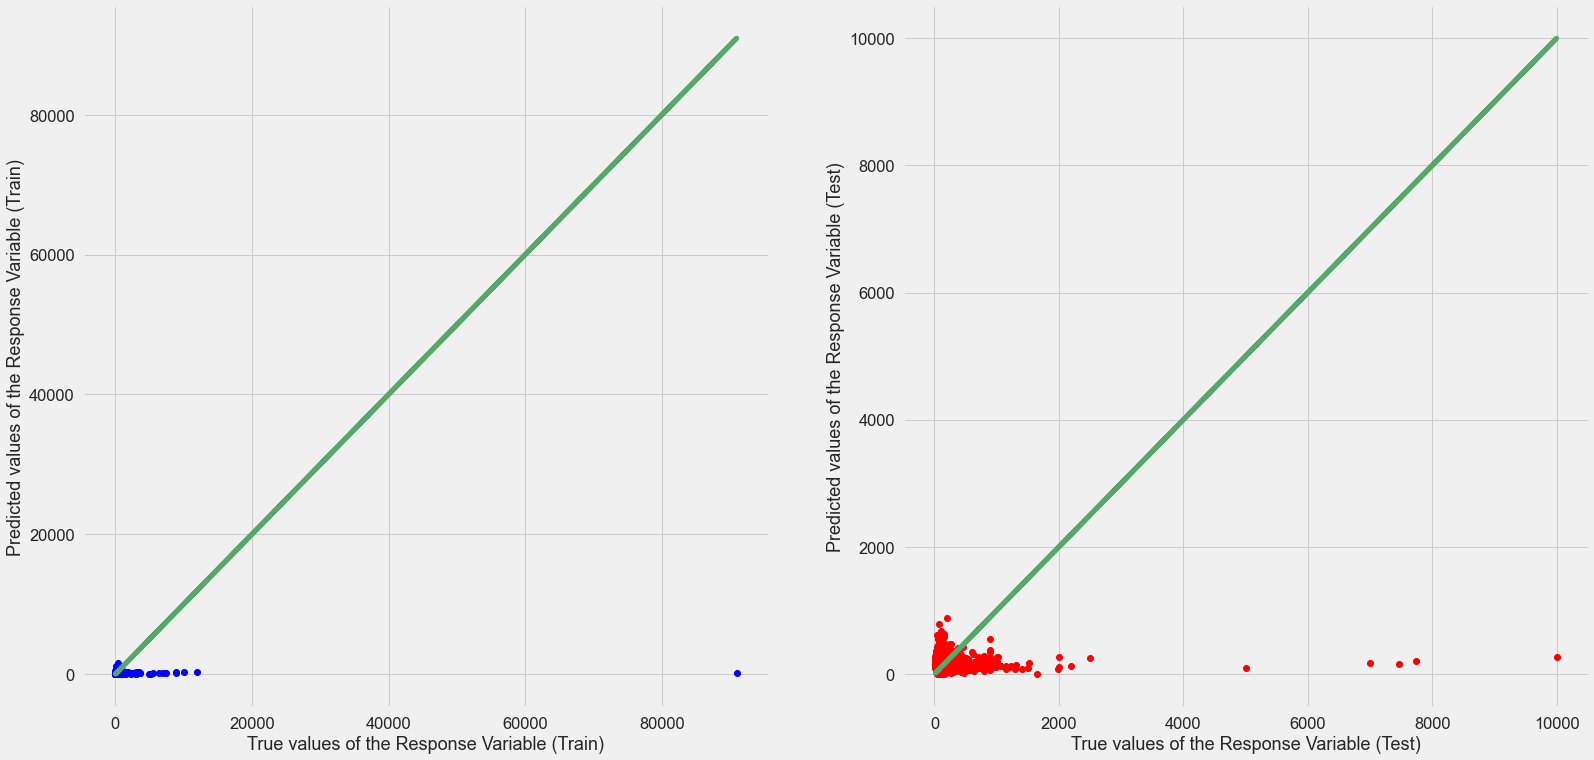

In [206]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictionLR, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictionLR, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")